In [35]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_style(style="darkgrid")

In [4]:
# axis=0 - rows, axis=1 - columns
# pd.set_option("max_columns", None) - To display all columns, receives int for the number of cols or None for all
# pd.set_option("max_rows", None) - to display all rows 
# to go back to the default options - pd.reset_option(“max_columns”)

dataset = pd.read_csv("fifa.csv").drop("Unnamed: 0", axis=1)
pd.set_option("max_columns", None) 
dataset.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


# Q1 - How does the distribution of players' overall scores differ from country to country?

In [5]:
len(dataset["Nationality"].unique())
len(dataset.groupby("Nationality"))

164

In [6]:
# pick the top 10 countries with most players as we have 164 countries 

# Size returns the grouped nations sizes, based on which it is sorted
# pd.DataFrame(df.groupby('week')['sales'].apply(list)) - returns a list of grouped nations, will be sorted alphabetically
# index picks the array of index here rather than the array of overall scores. (Displayed)

countries_with_max_players = dataset.groupby("Nationality").size().sort_values(ascending=False).index.values[:10]
countries_with_max_players

array(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil',
       'Italy', 'Colombia', 'Japan', 'Netherlands'], dtype=object)

Text(0.5, 0.98, 'Histogram for Overall Score (10 Countries)')

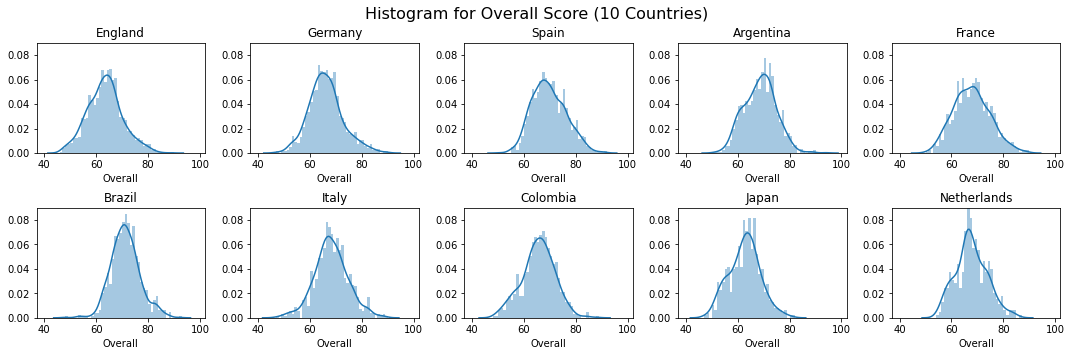

In [7]:
# Histogram lets you explore the underlying frequency distribution, so we'll plot hisotgrams for these countries

#**: exponentiation
# ^: exclusive-or (bitwise)
# %: modulus
# //: divide with integral result (discard remainder)

# A bin in a histogram is the block that you use to combine values before getting the frequency

fig, axes = plt.subplots(2,5, figsize=(15,5))
for i in range(10):
    # Get nationality and overall from the actual dataset where country name is equal to the ones we picked
    filtered_nation = dataset[dataset["Nationality"] == countries_with_max_players[i]] 
    ax = axes[i//5, i%5]
    sns.distplot(filtered_nation['Overall'], bins=range(40, 100, 1), ax=ax)
    # set all subplots with same y range to make them more comparison
    ax.set_ylim(0, 0.09)
    ax.set_title(countries_with_max_players[i])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('Histogram for Overall Score (10 Countries)', fontsize=16)

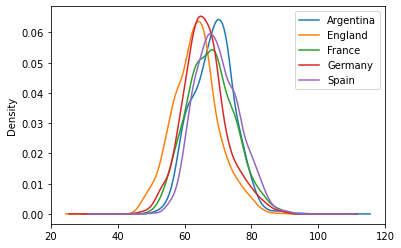

In [8]:
top_five_nations = dataset.groupby(['Nationality']).size().sort_values(ascending=False).head(5).index.values
data_top_five_nations = dataset[dataset['Nationality'].isin(top_five_nations)]

data_top_five_nations.groupby(['Nationality'])['Overall'].plot(kind = 'density')
plt.legend()

- The distribution of players overall score for each of the top 10 countries has a bell shape.
- The density curve of France is flatter than that of Brazil, suggesting a larger variance.
- The distribution from Spain is positive skewed. On the contrary, the distribution from England and Argentina are negative skewed.
- From the second graph, we can see that the density curve of Spain is to the right of the density curve of England, suggesting that Spain has better players than England.

### Notes: 
- Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode. Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

#### Variance: 
- The Variance is defined as: The average of the squared differences from the Mean. ... Work out the Mean (the simple average of the numbers) Then for each number: subtract the Mean and square the result (the squared difference). Then work out the average of those squared differences.
- Variance measures how far a set of data is spread out. ... A high variance indicates that the data points are very spread out from the mean, and from one another. Variance is the average of the squared distances from each point to the mean.

#### Mean, Median, Mode
- Mean, median, and mode are three kinds of "averages".
- The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers. 
- The "median" is the "middle" value in the list of numbers. To find the median, your numbers have to be listed in numerical order from smallest to largest, so you may have to rewrite your list before you can find the median. The median is sometimes used as opposed to the mean when there are outliers in the sequence that might skew the average of the values.
- The "mode" is the value that occurs most often. If no number in the list is repeated, then there is no mode for the list.

# Q2 - How does the distribution of players' potential scores differ from country to country?

Text(0.5, 0.98, 'Histogram for Potential Score (10 Countries)')

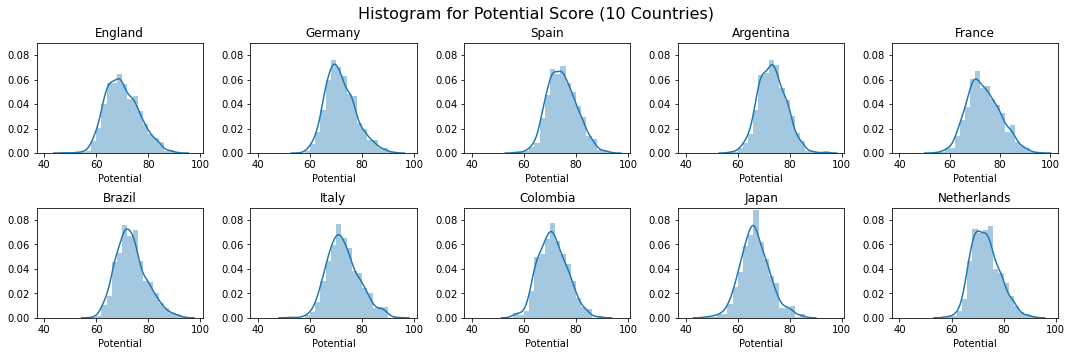

In [9]:
# Using the above top 10 nations

fig, axes = plt.subplots(2,5, figsize=(15,5))
for i in range(10):
    filtered_nation = dataset[dataset['Nationality'] == countries_with_max_players[i]]
    ax = axes[i//5, i%5]
    sns.distplot(filtered_nation['Potential'], bins=range(40, 100, 2), ax=ax)
    # set all subplots with same y range to make them more comparison
    ax.set_ylim(0, 0.09)
    ax.set_title(countries_with_max_players[i])

fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('Histogram for Potential Score (10 Countries)', fontsize=16)

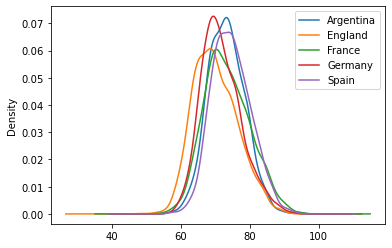

In [10]:
# Using above top 5 nations

data_top_five_nations.groupby(['Nationality'])['Potential'].plot(kind = 'density')
plt.legend()

- All distributions have the bell shape.
- Most distributions are positive skewed.
- Players from Argentina, Spain and France tend to have more potential then players from England and Germany.

# Q3 - How do the wages of players compare across top clubs?

In [11]:
len(dataset["Club"].unique())

652

In [17]:
top_ten_clubs = dataset.groupby("Club")["Overall"].sum().sort_values(ascending=False).index.values[:10]
top_ten_clubs

array(['Real Madrid', 'FC Barcelona', 'Manchester United', 'Chelsea',
       'Manchester City', 'Tottenham Hotspur', 'Liverpool',
       'Borussia Dortmund', 'Arsenal', 'Atlético Madrid'], dtype=object)

## Notes
- We found the top 10 clubs with highest scores and will plot a graph for their Wages. 
- Since the Wage and Values column contain alphabets so we need to convert to numeric values 

In [26]:
def convert_str_value_to_numeric(str_value):
    if str_value in ['NaN', 'nan', np.nan]:
        return np.nan
    else:
        if str_value.endswith('K'):
            multiplier = 1
        elif str_value.endswith('M'):
            multiplier = 1000
        else:
            multiplier = 1
        re_pattern = re.compile('[^0-9\.\-]')
        return float(re.sub(re_pattern, '', str_value)) * multiplier

In [27]:
dataset['Value_trans'] = dataset['Value'].apply(convert_str_value_to_numeric)
dataset['Wage_trans'] = dataset['Wage'].apply(convert_str_value_to_numeric)

- A box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability
- The boxes have been sorted depending on the median value of the wage.

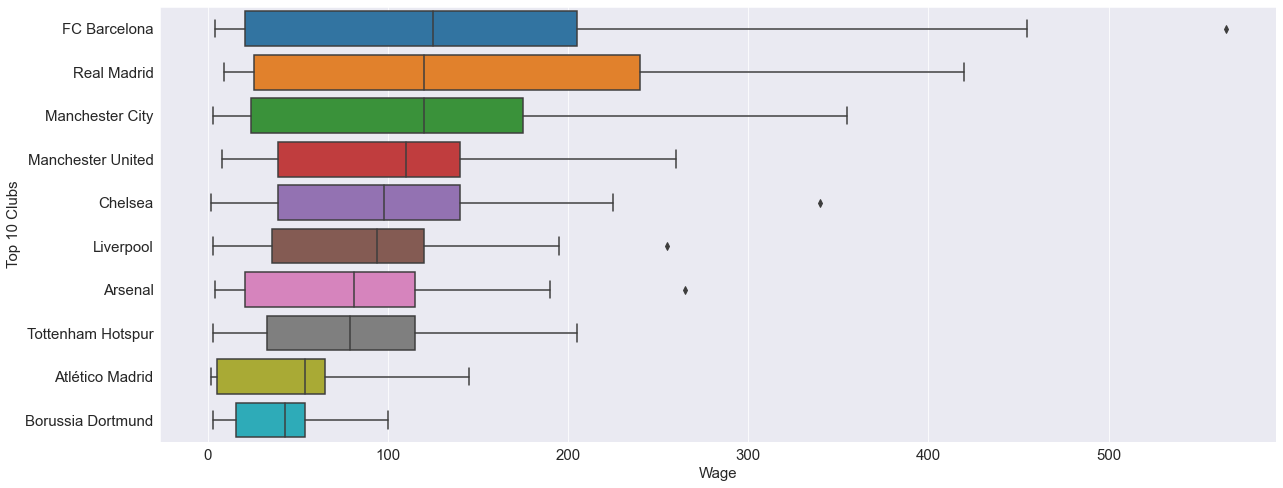

In [29]:
data_club = dataset[dataset['Club'].isin(top_ten_clubs)]
plt.figure(figsize=(20,8))
sns.boxplot(y='Club',
            x='Wage_trans',
            data=data_club, 
            orient="h",
            order=data_club.groupby(['Club'])['Wage_trans'].median().sort_values(ascending=False).index)
plt.xlabel('Wage', fontsize=15)
plt.ylabel('Top 10 Clubs', fontsize=15)
plt.tick_params(labelsize=15)

- The median wages of players from the top 10 clubs are quite different. The boxes have been sorted depending on the median value of the wage. FC Barcelona has the highest median wage, on the contrary, Borussia Dortmund has the smallest median wage.
- The box for Real Madrid is the longest one and the box for Borussia Dortmund is the shortest one, which means that the wage difference at Real Madrid is larger than that at Borussia Dortmund. 
- Among all players from the top 10 clubs, the player with the highest wage is from FC Barcelona.
- In some clubs, like FC Barcelona, Chelsea, Liverpool and Arsenal, one player has a much larger wage than all the other players from the same club.
- For most clubs, the distribution of players’ wage is positive skewed, especially Atlético Madrid.

# Q4 - How do market values of players compare across top clubs?

- We have already converted the Values column to numeric in box 27. Plotting the same box plot for the top ten clubs and their values. 

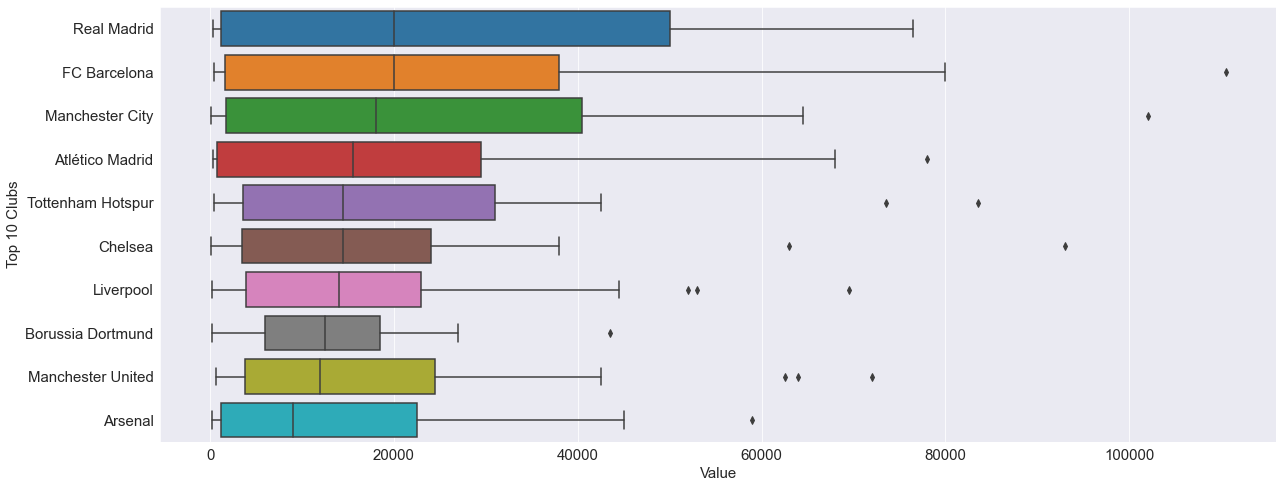

In [31]:
data_club = dataset[dataset['Club'].isin(top_ten_clubs)]
plt.figure(figsize=(20,8))
sns.boxplot(y='Club',
            x='Value_trans',
            data=data_club, 
            orient="h",
            order=data_club.groupby(['Club'])['Value_trans'].median().sort_values(ascending=False).index)
plt.xlabel('Value', fontsize=15)
plt.ylabel('Top 10 Clubs', fontsize=15)
plt.tick_params(labelsize=15)

- The players from Real Madrid has the largest median market value, followed by FC Barcelona.
- Most the clubs have a few players with much higher market value than other players from the same club.
For some clubs, like Real Madrid, Manchester City and Arsenal, the distribution of players’ market value are positive skewed.
- The box for Real Madrid is the longest one and the box for Borussia Dortmund is the shortest one, which means that the difference of market value of Real Madrid is larger than that of Borussia Dortmund.

# Q5 - How are Overall and Potential scores related?

- We will use regplot (regression plot) because the problem is about identifying the dependency and relation of two variables 

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

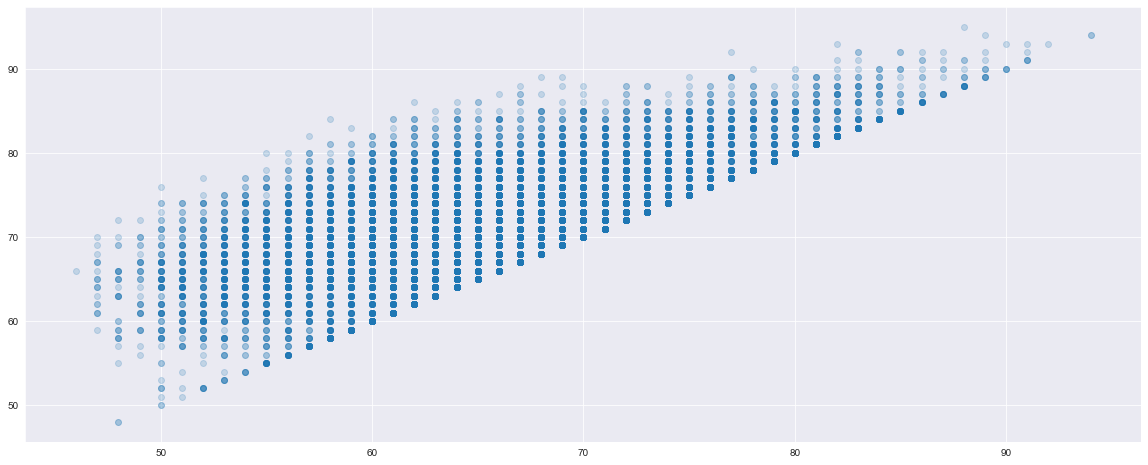

In [36]:
plt.figure(figsize=(20,8))
sns.regplot(x="Overall", y="Potential", data=dataset, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.xlabel('Overall Score', fontsize=15)
plt.ylabel('Potential Score', fontsize=15)

In [37]:
# https://stackoverflow.com/questions/60060301/typeerror-cannot-cast-array-data-from-dtypeint64-to-dtypeint32-accordin
# Need to fix this error

sns.__version__

'0.10.0'

- According to the scatter plot, for all players, the potential score is no lower than the overall score.
- The player with high potential score has a high overall score.
- For players with the same overall score, their potential score could be quite different.

# Q6- Do player values differ by players’ age? And do wages differ by players’ age?

- Using the top ten club data we created above and plotting box plots for them. 

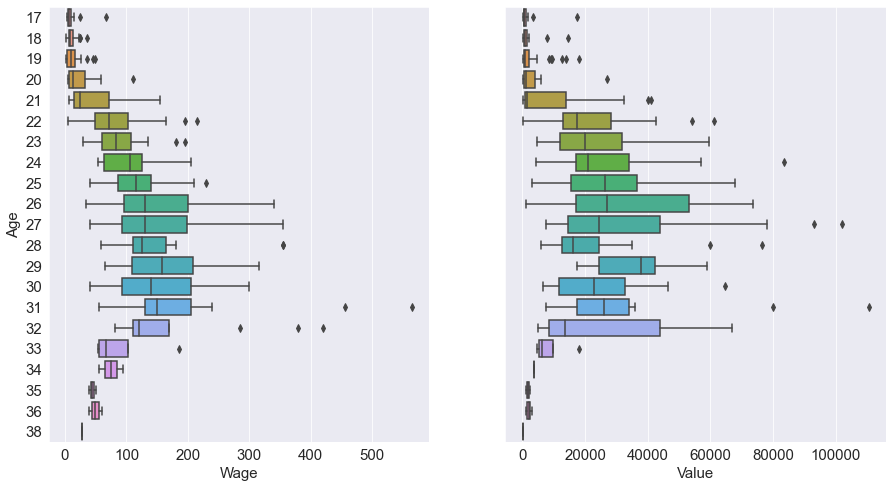

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,8), sharey=True)
sns.boxplot(y='Age',x='Wage_trans',data=data_club, orient='h', ax=ax[0])
ax[0].set_ylabel('Age', fontsize=15)
ax[0].set_xlabel('Wage', fontsize=15)
ax[0].tick_params(labelsize=15)

sns.boxplot(y='Age',x='Value_trans',data=data_club, orient='h', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Value', fontsize=15)
ax[1].tick_params(labelsize=15)

- Both the distribution of Wage and Value differ by age.
- Players with ages 26-31 tend to have higher wages compared to players from other age groups.
- Players' media value shows a great drop after 31.

In [39]:
dir(sns) # Displays all properties of this object

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

# Q7 - Does a player's value depend on his position?

- Need to re-visit Q7, Q8 and Q9

- Drop null values of Position column and copy in another dataframe to plot box plot for that specific column

In [41]:
data_position = dataset.dropna(axis=0, subset=['Position']).copy()

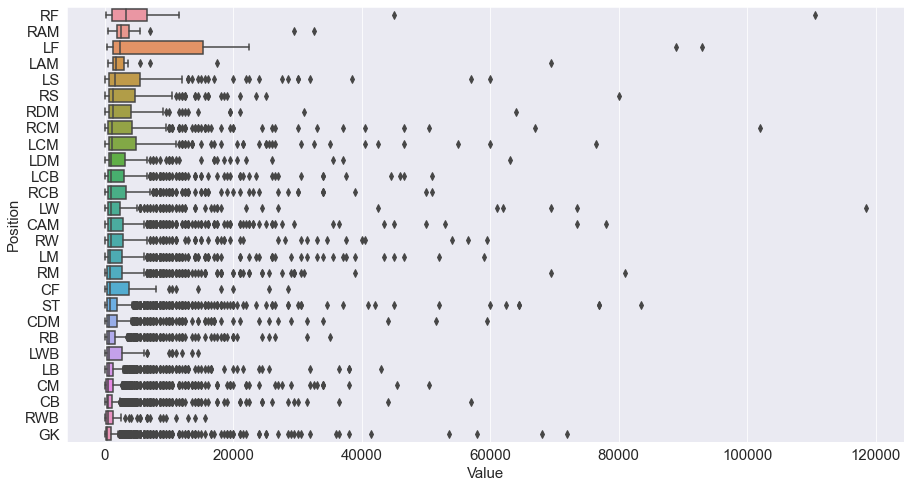

In [42]:
ax = plt.figure(figsize=(15,8))
ax = sns.boxplot(x='Value_trans',
                 y='Position',
                 data=data_position, 
                 order=data_position.groupby(
                     ['Position'])['Value_trans'].median().sort_values(ascending=False).index)
ax.set_ylabel('Position', fontsize=15)
ax.set_xlabel('Value', fontsize=15)
ax.tick_params(labelsize=15)

- The boxplot is sorted by the median value of the players from that position. RF has the highest median value and GK has the lowest median value. 
- The distribution of player's values are positively skewed.

#### Lots of outliers could be observed from the previous boxplot. (defined as outside of fixed factor of the IQR), and the distribution is heavy-tailed. Under this condition, transformations could be applied. One commonly used transformation is the log transformation.


In [43]:
data_position['log_value'] = np.log(data_position['Value_trans'] + 1) # +1 if the value is 0

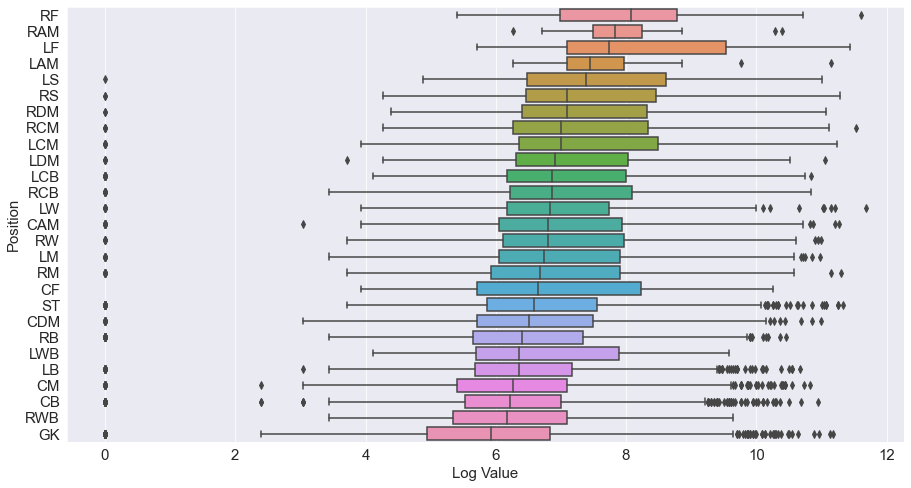

In [44]:
ax = plt.figure(figsize=(15,8))
ax = sns.boxplot(x='log_value',
                 y='Position',
                 data=data_position, 
                 order=data_position.groupby(
                     ['Position'])['Value_trans'].median().sort_values(ascending=False).index)
ax.set_ylabel('Position', fontsize=15)
ax.set_xlabel('Log Value', fontsize=15)
ax.tick_params(labelsize=15)

- The distribution of the data is now clearer to observe.

# Q8 - Who's the best player per position?

In [49]:
idx = data_position.groupby('Position')['Overall'].transform(max) == data_position['Overall']
data_position.loc[idx, ['Name','Position']].head(10)


,Name,Position
0,L. Messi,RF
1,Cristiano Ronaldo,ST
2,Neymar Jr,LW
3,De Gea,GK
4,K. De Bruyne,RCM
5,E. Hazard,LF
6,L. Modrić,RCM
7,L. Suárez,RS
8,Sergio Ramos,RCB
11,T. Kroos,LCM


# Q9 -  Do left footed players have an advantage over right footed players?

In [52]:
col = ['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle','Preferred Foot']

skill_df = dataset.dropna(axis=0, subset=col)

In [53]:
skill_df = pd.melt(skill_df[col], id_vars=['Preferred Foot'])
skill_df['value'] = skill_df['value'].astype('float')


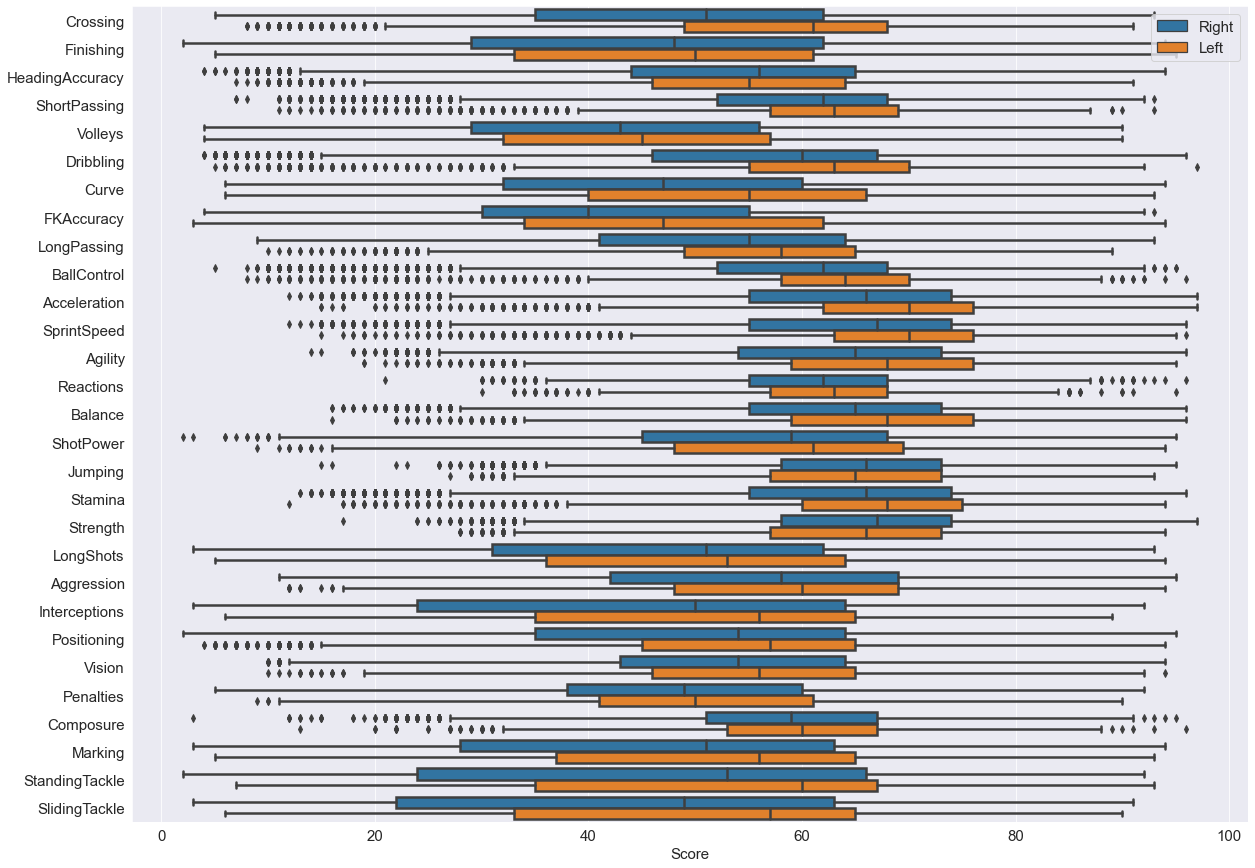

In [54]:
plt.figure(figsize=(20,15))
sns.boxplot(y='variable', 
            x='value', 
            hue="Preferred Foot", 
            data=skill_df,
            orient="h", 
            linewidth=2.5, 
            hue_order=['Right', 'Left'])
plt.tick_params(labelsize=15)
plt.ylabel(None)
plt.xlabel('Score', fontsize=15)
plt.legend(fontsize=15, loc=1)

- Left footed players have an advantage over right footed players in most of the abilities.
- In the meantime, for most variables, the deviations of values of the left footed players are smaller than those of the right footed players.